<a href="https://colab.research.google.com/github/sunitha-18577/Python-Fundamentals/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix

In [ ]:
try:
  df=pd.read_csv('/content/titanic_test.csv')
  df=pd.read_csv('/content/titanic_train.csv')
except FileNotFoundError:
  print("Error:The file 'data.csv' is empty.")
  exit()
except pd.errors.EmptyDataError:
  print("Error:The file 'data.csv' is empty.")
  exit()
except pd.errors.ParserError:
  print("Error:The file 'data.csv' is empty.")
  exit()

In [ ]:
print("First 5 rows of the dataset:")
print(df.head())
print("\nData types of each column:")
print(df.dtypes)
print("\nSummary statistics of the dataset:")
print(df.describe())

First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

In [ ]:
numeric_data = df.select_dtypes(include=np.number)
df.fillna(numeric_data.mean(), inplace=True)

In [ ]:
categorical_cols = ['Embarked','Sex', 'Pclass']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
df=df.drop('Name', axis=1)

In [ ]:
df = df.drop('Ticket', axis=1)

In [ ]:
df = df.drop('Cabin', axis=1)

In [ ]:
x = df.drop('Survived', axis=1)
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression # Import LogisticRegression


In [ ]:
x = df.drop('Survived', axis=1)
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear', random_state=42)

In [ ]:
model.fit(x_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
y_pred=model.predict(x_test)
y_prob=model.predict_proba(x_test)[:,1]
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.7988826815642458


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, recall_score,f1_score
recall=recall_score(y_test,y_pred)
print("Recall:",recall)

Recall: 0.7027027027027027


In [ ]:
f1=f1_score(y_test,y_pred)
print("F1 Score:",f1)

F1 Score: 0.7428571428571429


In [ ]:
roc_auc=roc_auc_score(y_test,y_prob)
print("ROC AUC Score:",roc_auc)

ROC AUC Score: 0.8671814671814672


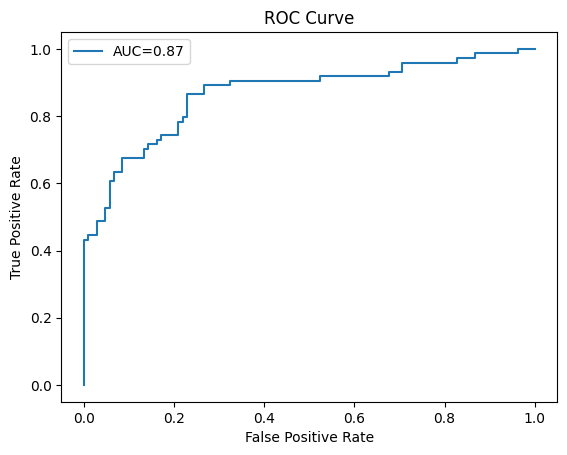

In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
plt.plot(fpr,tpr,label=f'AUC={roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

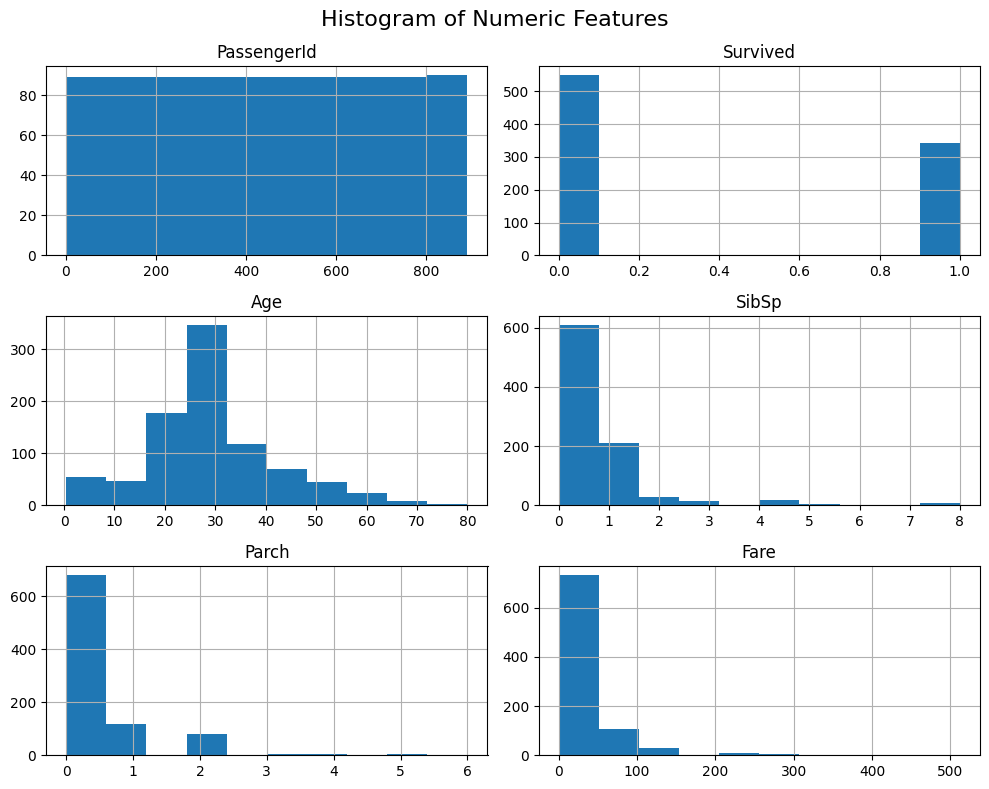

In [ ]:
df.hist(figsize=(10,8))
plt.suptitle('Histogram of Numeric Features',fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
for column in df.select_dtypes(include=['object']).columns:
  plt.figure(figsize=(8,6))
  sns.boxplot(x=column,y='Survived',data=df)
  plt.title(f'Box Plot of {column}')
  plt.show()

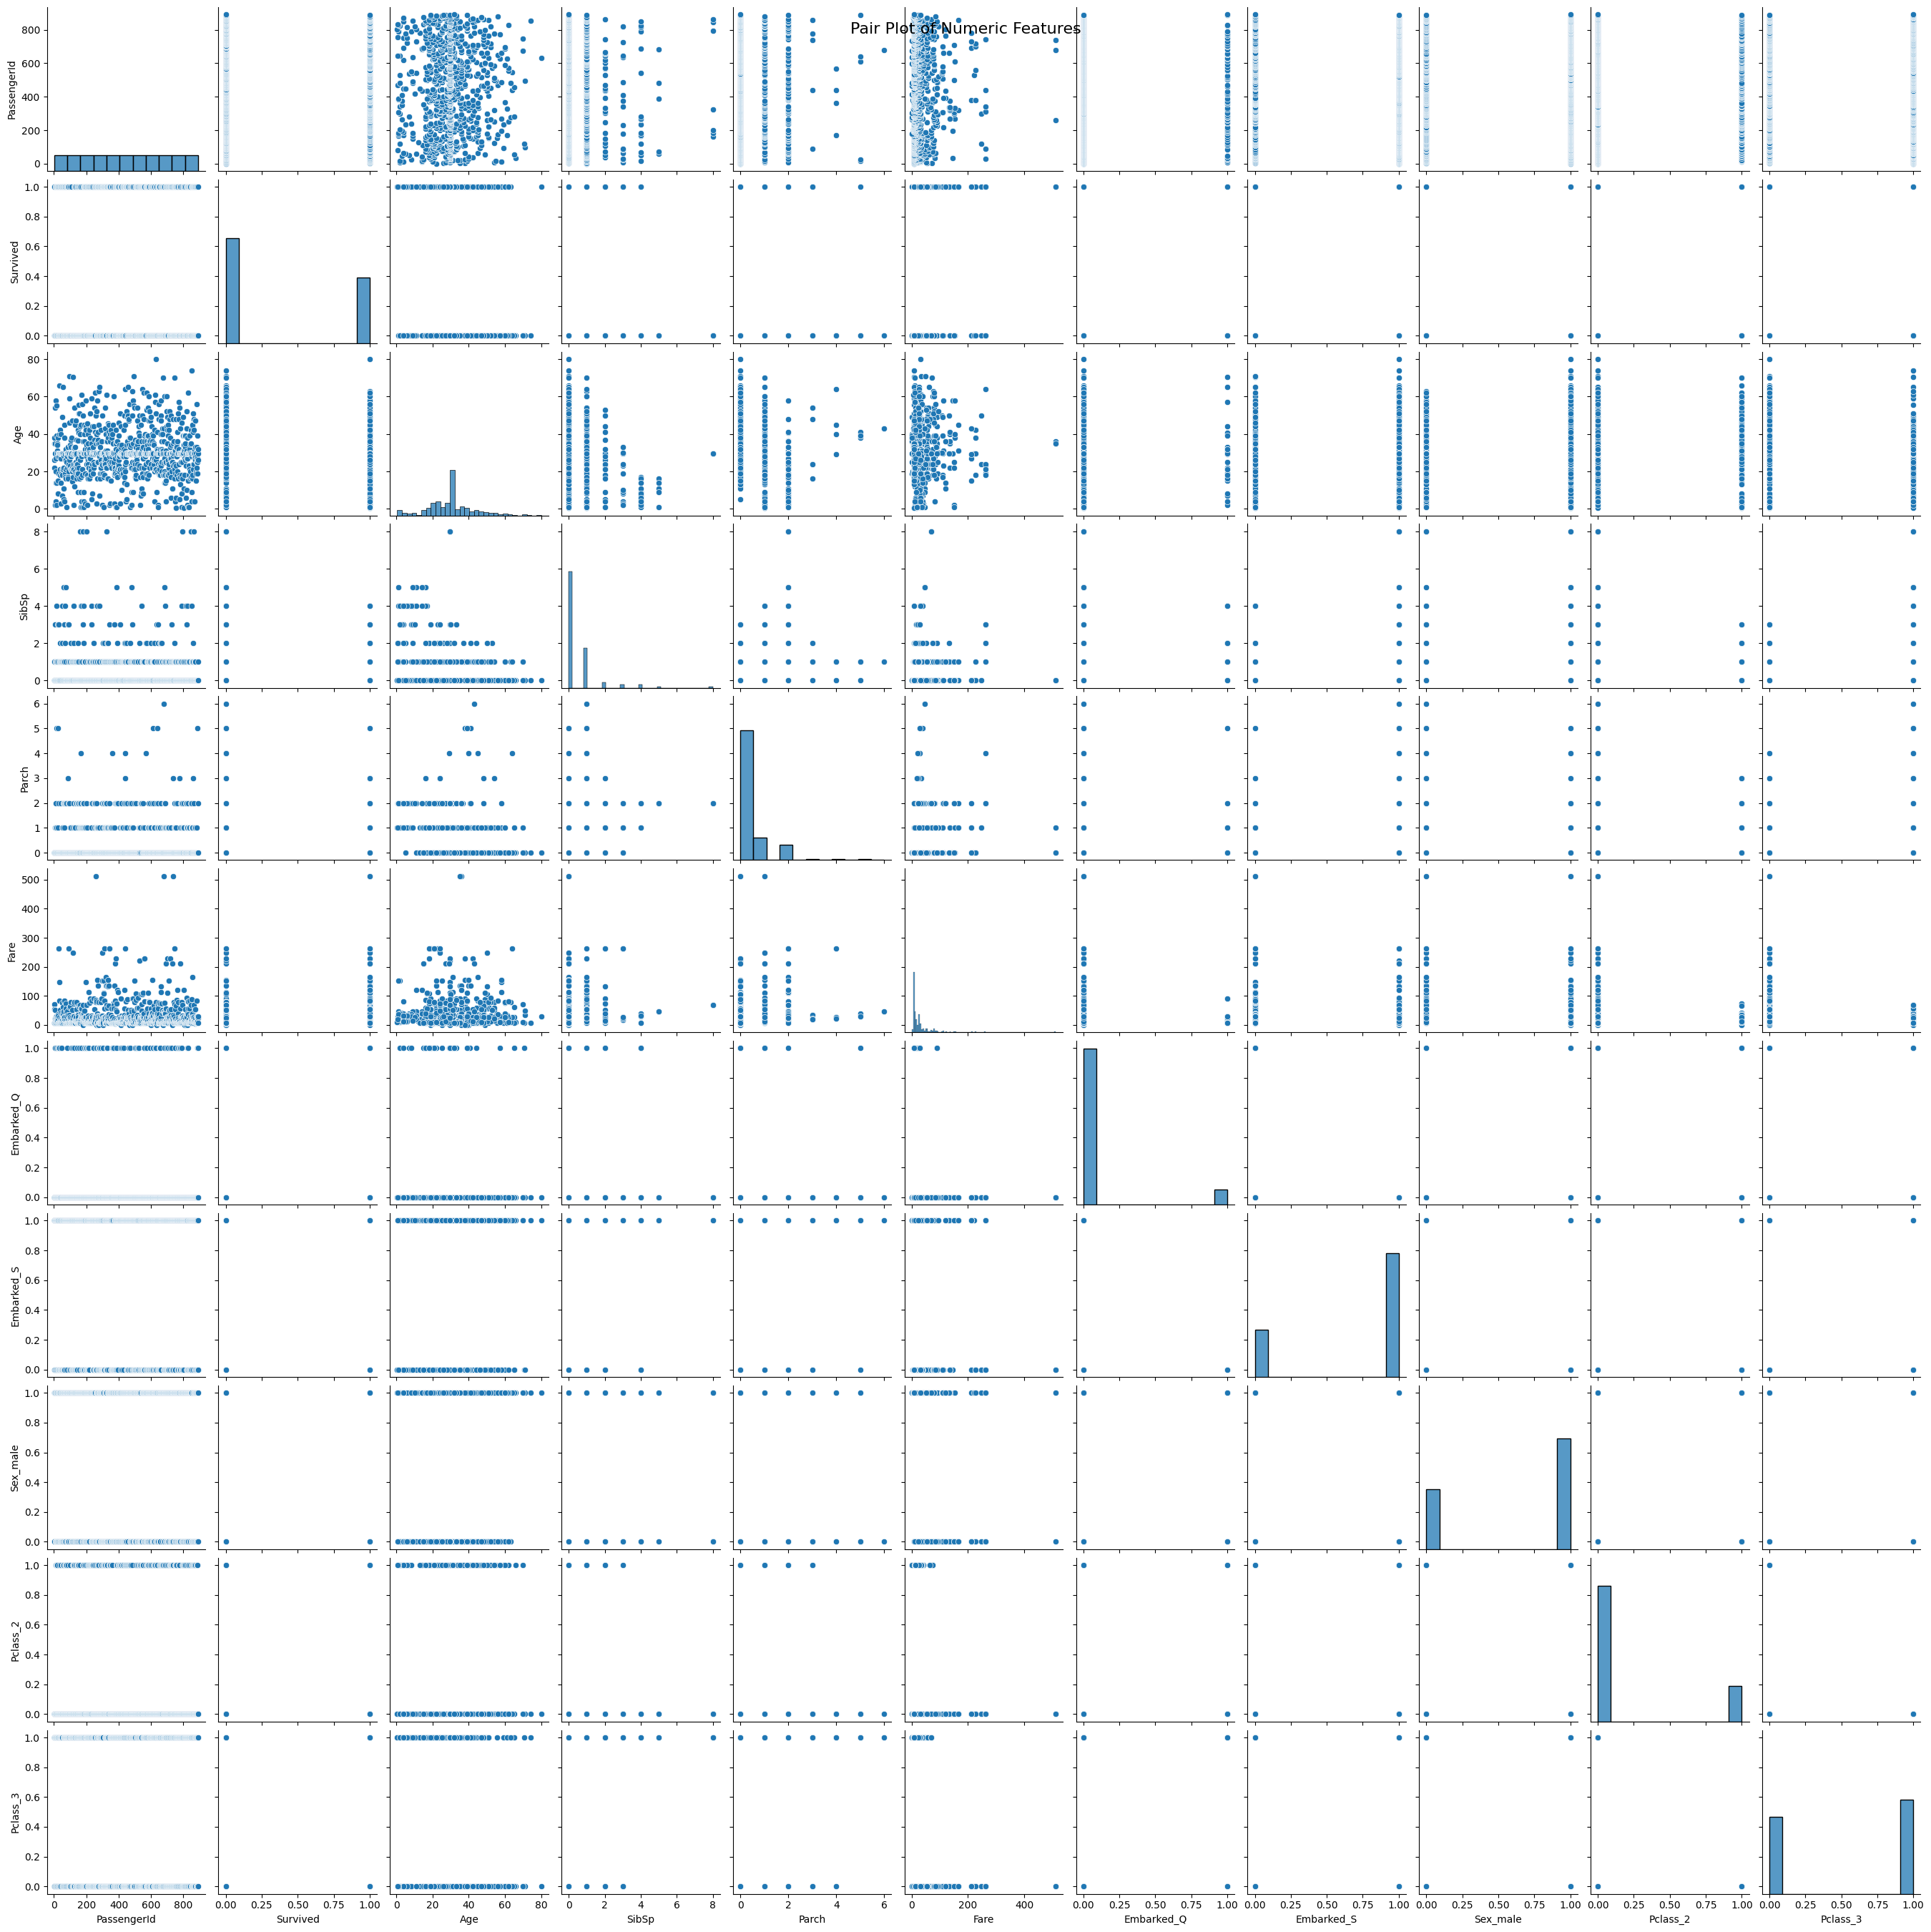

In [ ]:
sns.pairplot(df)
plt.suptitle('Pair Plot of Numeric Features',fontsize=16)
plt.show()

In [ ]:
print("\nMissing values before handling:")
print(df.isnull().sum())


Missing values before handling:
PassengerId    0
Survived       0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_Q     0
Embarked_S     0
Sex_male       0
Pclass_2       0
Pclass_3       0
dtype: int64


In [ ]:
numeric_data = df.select_dtypes(include=np.number)
df.fillna(numeric_data.mean(), inplace=True)
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
PassengerId    0
Survived       0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_Q     0
Embarked_S     0
Sex_male       0
Pclass_2       0
Pclass_3       0
dtype: int64


In [ ]:
data = pd.get_dummies(df, columns=df.select_dtypes(include='object').columns)
print("\nUnique values in categorical columns after encoding:")
for column in data.select_dtypes(include='object').columns:
  print(f"{column}:{data[column].unique()}")
  print(f"{column}:{data[column].unique()}")
  plt.show()


Unique values in categorical columns after encoding:


In [ ]:
print('\nCoefficients of the model:')
print(pd.DataFrame({'Feature':x.columns,'Coefficient':model.coef_[0]}))



Coefficients of the model:
       Feature  Coefficient
0  PassengerId     0.000514
1          Age    -0.021946
2        SibSp    -0.262215
3        Parch    -0.122849
4         Fare     0.005772
5   Embarked_Q    -0.032323
6   Embarked_S    -0.365901
7     Sex_male    -2.472510
8     Pclass_2    -0.202472
9     Pclass_3    -1.338225


In [ ]:
y_pred=model.predict(x_test)
accurcy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Accuracy:",accuracy)
print("Recall:",recall)
print("F1 Score:",f1)

Accuracy: 0.7988826815642458
Recall: 0.7027027027027027
F1 Score: 0.7428571428571429


In [ ]:
y_prob=model.predict(x_test)
roc_auc=roc_auc_score(y_test,y_prob)
print("ROC AUC Score:",roc_auc)

ROC AUC Score: 0.7846846846846847


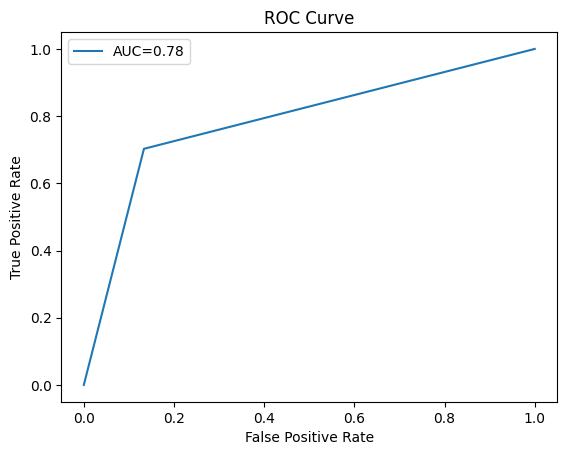

In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
plt.plot(fpr,tpr,label=f'AUC={roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
print(model.coef_)

[[ 5.14164643e-04 -2.19457881e-02 -2.62214872e-01 -1.22848573e-01
   5.77214875e-03 -3.23230062e-02 -3.65900794e-01 -2.47250972e+00
  -2.02471609e-01 -1.33822534e+00]]


In [ ]:
print("https://pypi.org/project/streamlit/")

https://pypi.org/project/streamlit/


In [ ]:
import streamlit as st

st.title('My Streamlit App')
name=st.text_input('Enter your name')
st.write('Hello',name)
st.write('Hello',name)
st.write('Hello',name)
st.write('Hello',name)

ModuleNotFoundError: No module named 'streamlit'

In [ ]:
pickle.dump(model,open('model.pkl','wb'))

In [ ]:
st.title('Logistic Regression App')

2025-05-27 15:44:42.207 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 15:44:42.360 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-27 15:44:42.361 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [ ]:
input_feature1=st.number_input('Enter the value of feature 1')
input_feature2=st.number_input('Enter the value of feature 2')

2025-05-27 15:44:48.423 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 15:44:48.424 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 15:44:48.425 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 15:44:48.426 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 15:44:48.427 Session state does not function when running a script without `streamlit run`
2025-05-27 15:44:48.428 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 15:44:48.428 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 15:44:48.429 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 15:44

In [ ]:
if st.button('Predict'):
  loaded_model=pickle.load(open('model.pkl','rb'))
  input_data=np.array([[input_feature1,input_feature2]]).reshape(1,-1)
  prediction=model.predict(input_data)

2025-05-27 15:44:52.176 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 15:44:52.177 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 15:44:52.178 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 15:44:52.179 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 15:44:52.180 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
print("\n Interview Questions:")
print("1.what is the difference between precision and recall?")
print("Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.")
print("Recall is the ratio of correctly predicted positive observations to the all observations in actual class.")


 Interview Questions:
1.what is the difference between precision and recall?
Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
Recall is the ratio of correctly predicted positive observations to the all observations in actual class.


In [ ]:
print("2.What is cross-validation,and why is it important in machine learning?")
print("Cross-validation is a technique used in machine learning to evaluate the performance of a model on unseen data.")
print("training the model on some folde ,and testing it on the remaining fold .it helps tp prevent overfitting and provides a more accurate estimate of the model's performance.")
print("that the model will generalize well to new data.")

2.What is cross-validation,and why is it important in machine learning?
Cross-validation is a technique used in machine learning to evaluate the performance of a model on unseen data.
training the model on some folde ,and testing it on the remaining fold .it helps tp prevent overfitting and provides a more accurate estimate of the model's performance.
that the model will generalize well to new data.
